<a href="https://colab.research.google.com/github/Tegarsamudra/TUGAS_PYTHON/blob/main/TEGAR%20JATI%20SAMUDRA_1101194087_TT43G1_TUGAS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TUGAS11

/content/drive/MyDrive/TUGAS11


In [ ]:
ls

3S/             GMB_02TEST.jpg  GMB_04TEST.jpg
GMB_01TEST.jpg  GMB_03TEST.jpg  GMB_05TEST.jpg


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3S")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((192, 192))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 192, 192, 3)
(146, 192, 192, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(192,192,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 188, 188, 16)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 92, 92, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 32)       

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 13s 960ms/step - loss: 1.6106 - accuracy: 0.2055 - val_loss: 1.5987 - val_accuracy: 0.3356
Epoch 2/25
14/14 [==============================] - 13s 964ms/step - loss: 1.5412 - accuracy: 0.3744 - val_loss: 1.3763 - val_accuracy: 0.4452
Epoch 3/25
14/14 [==============================] - 14s 974ms/step - loss: 1.3100 - accuracy: 0.4338 - val_loss: 1.1303 - val_accuracy: 0.5616
Epoch 4/25
14/14 [==============================] - 14s 970ms/step - loss: 1.1352 - accuracy: 0.5342 - val_loss: 1.0330 - val_accuracy: 0.5822
Epoch 5/25
14/14 [==============================] - 14s 966ms/step - loss: 0.8802 - accuracy: 0.6324 - val_loss: 0.8394 - val_accuracy: 0.6712
Epoch 6/25
14/14 [==============================] - 14s 970ms/step - loss: 0.7102 - accuracy: 0.7237 - val_loss: 0.6488 - val_accuracy: 0.7808
Epoch 7/25
14/14 [==============================] - 13s 963ms/step - loss: 0.5741 - accuracy: 0.7626 - val_loss: 0.7697 - val_accuracy: 0.6712

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


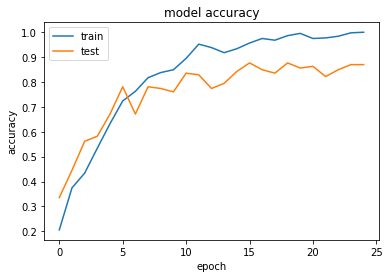

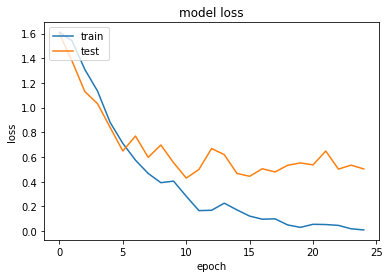

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.79      0.82      0.81        28
      GMB_02       0.79      0.85      0.82        27
      GMB_03       0.93      0.96      0.95        28
      GMB_04       0.88      0.79      0.84        29
      GMB_05       0.94      0.91      0.93        34

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.87      0.87      0.87       146



In [ ]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='GMB_02TEST.jpg'

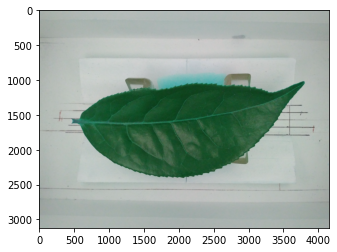

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('GMB_02TEST.jpg')
image_testing = np.array(image_testing.resize((192, 192))) / 255.0
image_testing.shape

(192, 192, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 192, 192, 3)


In [ ]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.1609964e-04 9.9114382e-01 2.4907074e-03 7.7166688e-04 4.6777660e-03]]
['GMB_02']
